**DSCI 100: GROUP PROJECT PROPOSAL**

**I. Introduction**

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increase in cost of living has caused 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: will an individual default on their credit payment? 

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit, history of past payments, bill statement amounts, previous payment amounts, and most importantly, whether this individual had defaulted. 

**II. Preliminary Exploratory Data Analysis**

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


DEFAULT,count,percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


BILL_SEPT,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52078.22,50029.63,48032.24,44312.64,41349.74,39731.71,5788.625,5940.109,5254.558,4861.044,4661.477,5126.886


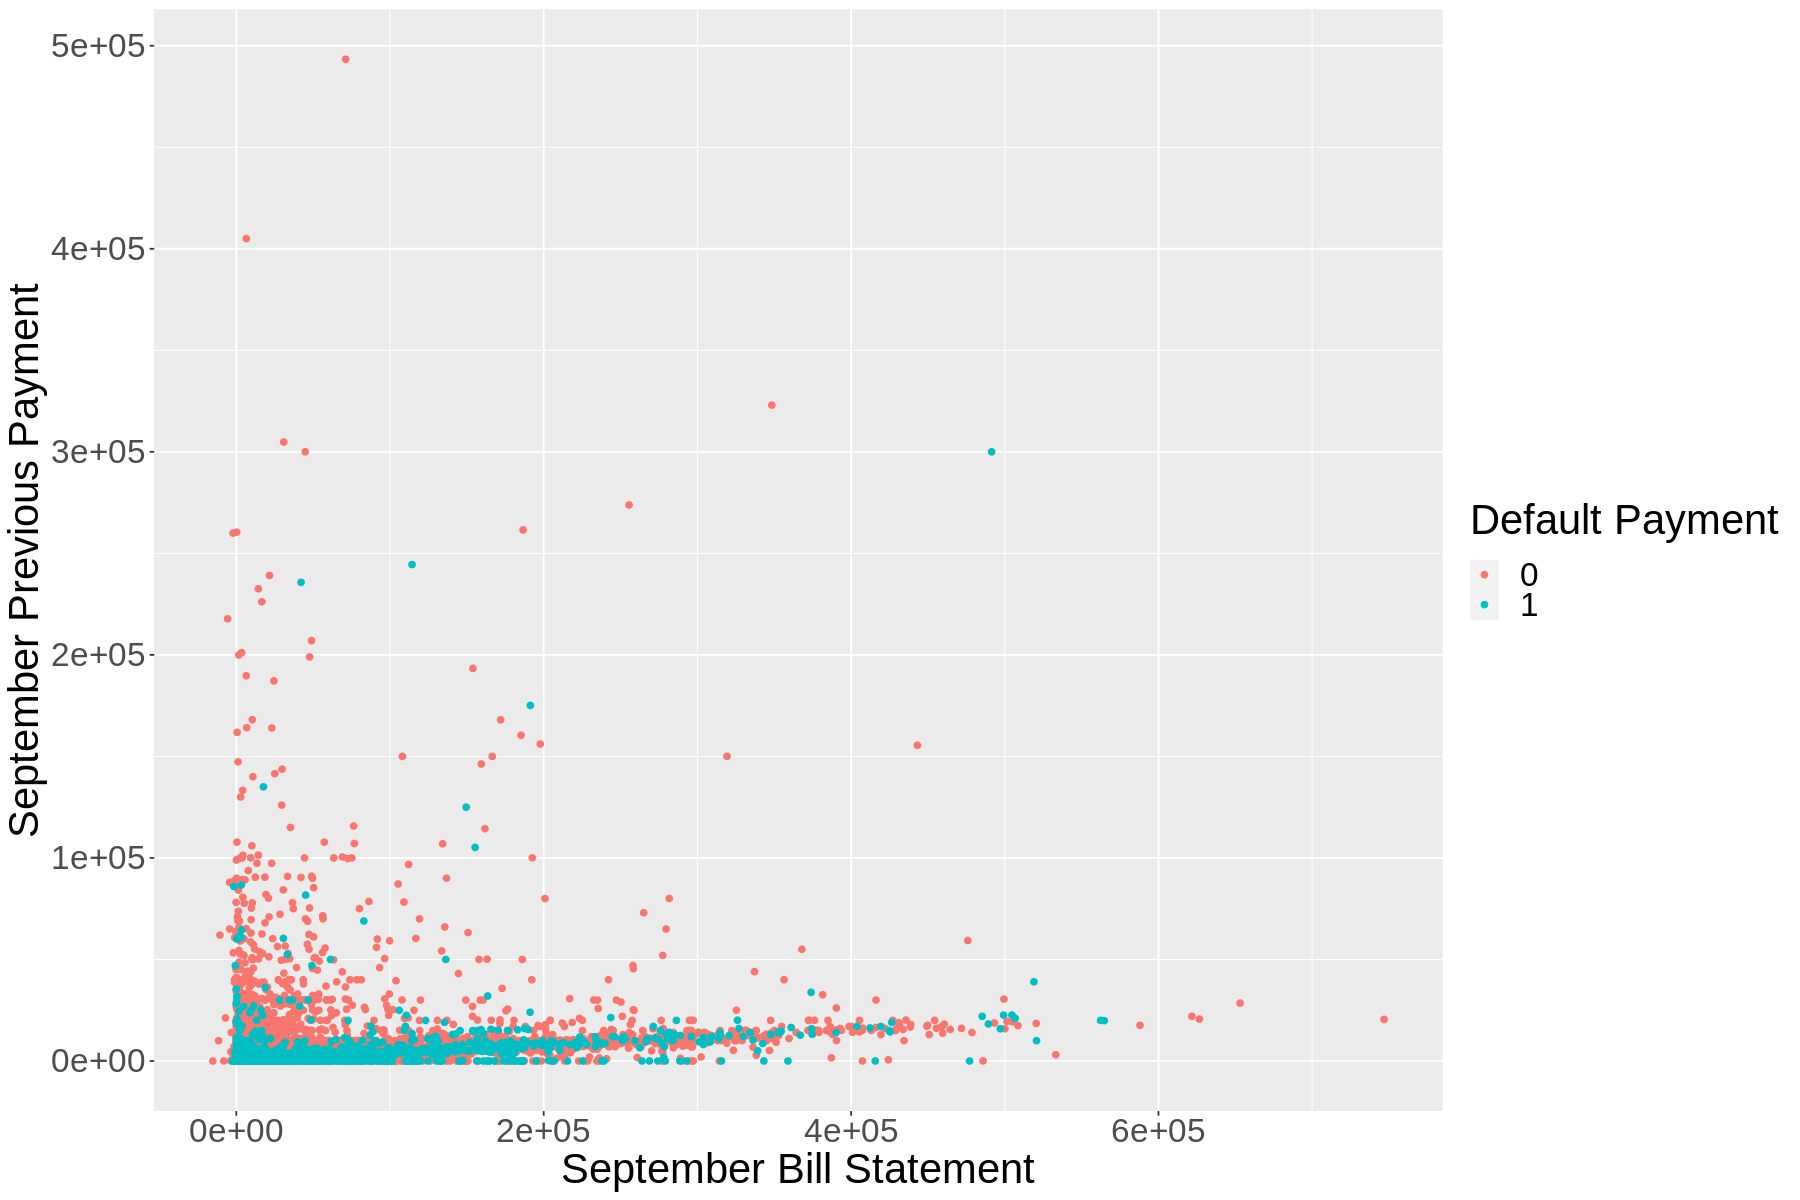

In [18]:
library(repr)
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)

set.seed(1)

tidy_credit_data <- credit_data |>
rename(BILL_SEPT = BILL_AMT1,
       BILL_AUG = BILL_AMT2,
       BILL_JUL = BILL_AMT3,
       BILL_JUN = BILL_AMT4,
       BILL_MAY = BILL_AMT5,
       BILL_APR = BILL_AMT6,
       PAY_SEPT = PAY_AMT1,
       PAY_AUG = PAY_AMT2,
       PAY_JUL = PAY_AMT3,
       PAY_JUN = PAY_AMT4,
       PAY_MAY = PAY_AMT5,
       PAY_APR = PAY_AMT6,
       DEFAULT = "default payment next month") |>

slice_sample(n = 15000) |>
mutate(DEFAULT= as_factor(DEFAULT)) 

credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

num_obs <- nrow(credit_train)
credit_train |>
group_by(DEFAULT) |>
summarize(count = n(), percentage = n() / num_obs * 100)

average_summarize <- credit_train |>
select(BILL_SEPT:PAY_APR) |>
map_df(mean, na.rm=TRUE)
average_summarize

#GRAPH 
options(repr.plot.width = 15, repr.plot.height = 10)

billsept_paysempt <- credit_train |>
ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
geom_point(alpha = 1.0) +
labs(x = "September Bill Statement", 
     y = "September Previous Payment", 
     color = "Default Payment") +
theme(text = element_text(size = 25)) 

billsept_paysempt



**III. Method**

#Stephanie 

Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. 
In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results


**VI. Expected outcomes and significance**

#Aaron

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?